In [568]:
from importlib import reload
import cohort_model
import fitness_calculations
reload(figures)
reload(cohort_model)
reload(fitness_calculations)

<module 'fitness_calculations' from '/Users/oda/Dropbox/1 Prosjekt/risky_ageing/fitness_calculations.py'>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.optimize import brentq

from cohort_model import get_cohort_model_data, get_mean_and_std, population_survivorship_difference, HYP_WILD_TYPE, MUTANT_WILD
import figures

from fitness_calculations import get_fig_3_data, get_fitness_data

In [2]:
### Common parameters for figures 1, 2 ###
number_of_individuals = 1000
alpha = 0.000222
kappa = 0.033
epsilon = 0.04
hazard_rate_wild_type = 0.04015625 # 0.03855/(1 - epsilon) #TODO: Vise hvordan 0.03855 ble funnet

# Figure 1

In [3]:
### Figure 1 specific parameters ###
number_of_repetitions = 100
t_m_captivity = 201
t_m_wild = 100
t_m_hyp_wt = 100

In [4]:
captivity_population, wild_population, hyp_wt_population = get_cohort_model_data(
        t_m_captivity=t_m_captivity,
        t_m_wild=t_m_wild,
        t_m_hyp_wt=t_m_hyp_wt, 
        number_of_individuals=number_of_individuals,
        alpha=alpha,
        kappa=kappa,
        epsilon=epsilon,
        hazard_rate_wild_type=hazard_rate_wild_type, # 0.03855/(1 - epsilon) #TODO: Vise hvordan 0.03855 ble funnet
        number_of_repetitions=number_of_repetitions)

In [5]:
mean_captivity, std_captivity = get_mean_and_std(captivity_population)
mean_wild, _ = get_mean_and_std(wild_population)
mean_hyp_wt, std_hyp_wt = get_mean_and_std(hyp_wt_population)

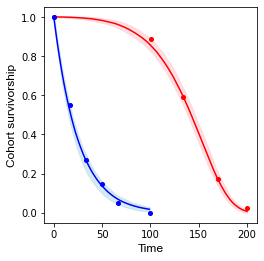

In [6]:
figures.plot_fig_1(
    t_m_captivity=t_m_captivity,
    t_m_wild=t_m_wild,
    t_m_hyp_wt=t_m_hyp_wt,
    mean_captivity=mean_captivity, 
    std_captivity=std_captivity, 
    mean_wild=mean_wild,
    mean_hyp_wt=mean_hyp_wt,
    std_hyp_wt=std_hyp_wt
)

# Figure 2

In [7]:
### Figure 2 specific parameters ###
number_of_repetitions = 1000 # Also used in figure 3
t_m = 100  # Also used in figure 3
epsilons = np.array([0.01, 0.02, 0.03, 0.04])
hazard_rates_wt = np.array([0.03893939, 0.03933673, 0.039742268,0.04015625]) # based on previous least-squares fitting: (1-epsilon)p_wt = 0.0385499

In [8]:
population_simulations, mean_diff, std_diff = population_survivorship_difference(
    number_of_individuals=number_of_individuals,
    number_of_repetitions=number_of_repetitions,
    epsilons=epsilons,
    hazard_rates_wt=hazard_rates_wt,
    alpha=alpha,
    kappa=kappa,
    t_m=t_m
)

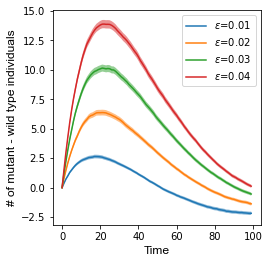

In [9]:
figures.plot_fig_2(t_m, mean_diff, std_diff, number_of_repetitions)

# Figure 3

In [10]:
### Figure 3 specific parameters ###
# population_simulations parameter is carried over as a result from calculations for figure 2

# OBS: Endre til 38 og 78, nå som t1 => t0?
fertility_wt = [(39, 24.0), (79, 24.0)]
fertility_mut = [(39, 24.0), (79, 18.0)]

In [11]:
fitness_stats_wt = get_fitness_data(population_simulations[HYP_WILD_TYPE], number_of_repetitions, t_m, fertility_wt)
fitness_stats_mut = get_fitness_data(population_simulations[MUTANT_WILD], number_of_repetitions, t_m, fertility_mut)

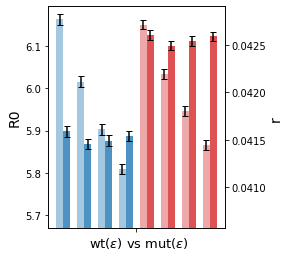

In [12]:
figures.plot_fig_3(fitness_stats_wt, fitness_stats_mut)

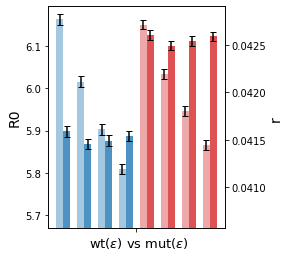

In [462]:
#Plotting Fig 3
y1_pos = np.array([0,3,6,9])
y2_pos = np.array([1,4,7,10])
y3_pos = np.array([2,5,8,11])

y4_pos = np.array([12,15,18,21])
y5_pos = np.array([13,16,19,22])
y6_pos = np.array([14,17,20])

y7_pos =[11] #[4,12]
dummy_R0 = np.zeros(4)
dummy_r = np.zeros(3)

fig,ax1 = plt.subplots(figsize=(6,6))

ax1.bar(y1_pos,mean_R0_wt_const,width = 1.0,yerr=sem_R0_wt_const, align='center', alpha=0.4, ecolor='black', capsize=3, color = 'C0');
ax1.bar(y2_pos,mean_R0_mut_const,width = 1.0,yerr=sem_R0_mut_const, align='center', alpha=0.8, ecolor='black', capsize=3, color = 'C0');
ax1.bar(y3_pos,dummy_R0,width=0.3,color = 'w') #The width spec does not seem to work. width only refers to the relative width in the slot..

ax1.set_ylabel('R0',fontsize=14);
ax1.set_ylim(0.92*mean_R0_wt_const[0],1.005*mean_R0_wt_const[0])

ax2 = ax1.twinx()

ax2.bar(y4_pos,mean_r_wt_const,width = 1.0,yerr=sem_r_wt_const, align='center', alpha=0.4, ecolor='black', capsize=3,color = 'C3');
ax2.bar(y5_pos,mean_r_mut_const,width = 1.0,yerr=sem_r_mut_const, align='center', alpha=0.8, ecolor='black', capsize=3,color = 'C3');
ax2.bar(y6_pos,dummy_r,width=0.3,color = 'w') 

ax2.set_ylabel('r ',fontsize=14);
ax2.set_ylim(0.95*mean_r_wt_const[0],1.0045*mean_r_wt_const[0])

ax2.set_xticks(y7_pos);

xticks = [' wt($\epsilon$) vs mut($\epsilon$)']
ax1.set_xticklabels(xticks, fontsize=13);

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)
#plt.savefig('RA_PNAS_fig3_Frontinella.pdf', dpi = 1200, bbox_inches="tight");

# Figure 5